# Network Analysis

## 1.1 Centrality Measures
Select 3 centrality measures to characterise nodes, aiming at identifying the most important nodes in 
the underground network. Give the definition of each of the measures (including their equation), put 
the measures into the context of the underground, and why they will allow you to find the stations that 
are most crucial for the functioning of the underground. Compute the measures for your nodes in the 
network, and give the results in a table for the first 10 ranked nodes for each of the 3 measures.  

In [2]:
import pandas as pd
import numpy as np
import geopandas as gpd
import networkx as nx
import matplotlib.pyplot as plt
from matplotlib.pyplot import cm
import json
import re
from shapely.geometry import Point, LineString
from scipy.spatial import distance
import matplotlib.pyplot as plt
import pandas as pd
import networkx as nx
import numpy as np
from operator import itemgetter
import copy
import warnings
warnings.filterwarnings('ignore')

# for plotting legend moving around
from matplotlib.ticker import MaxNLocator

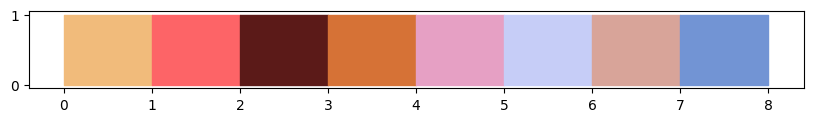

In [3]:
# Now import my favourite colour palette:
gbp_colors = ["#F1BB7B", "#FD6467", "#5B1A18", "#D67236", "#E6A0C4", "#C6CDF7", "#D8A499", "#7294D4"]

# Now let's plot color pallette
plt.figure(figsize=(10, 1))
for i, color in enumerate(gbp_colors):
    plt.fill_between([i, i + 1], 0, 1, color=color)


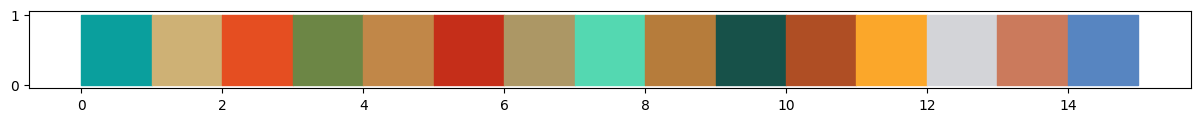

In [4]:
# Now import my favourite colour palette:
asteroid_city_col = ["#0A9F9D", "#CEB175", "#E54E21", "#6C8645", "#C18748", 
                     "#C52E19", "#AC9765", "#54D8B1", "#b67c3b", "#175149", 
                     "#AF4E24", "#FBA72A", "#D3D4D8", "#CB7A5C", "#5785C1"]

# Now let's plot color pallette
plt.figure(figsize=(15, 1))
for i, color in enumerate(asteroid_city_col):
    plt.fill_between([i, i + 1], 0, 1, color=color)

### 1.1.0 Read the data, and explore the network:

In [5]:
# make multiple copies of the graph
london_graph = nx.read_graphml('london_updated.graph')
london_graph3a = nx.read_graphml('london_updated.graph')
london_graph3b = nx.read_graphml('london_updated.graph')

In [6]:
# convert str into tuple:
for node in london_graph.nodes():
    london_graph.nodes[node]['coords'] = eval(london_graph.nodes[node]['coords'])

In [7]:
# convert str into tuple:
for node in london_graph3a.nodes():
    london_graph3a.nodes[node]['coords'] = eval(london_graph3a.nodes[node]['coords'])

In [8]:
# convert Str into tuple:
for node in london_graph3b.nodes():
    london_graph3b.nodes[node]['coords'] = eval(london_graph3b.nodes[node]['coords'])

In [9]:
# Take a look at our data
print("number of nodes: ",london_graph.number_of_nodes())
print("number of edges: ",london_graph.number_of_edges())

number of nodes:  401
number of edges:  467


In [10]:
list(london_graph.nodes(data = True))[0]

('Wembley Park', {'coords': (519316.5590174915, 186389.32981656672)})

In [11]:
# To check edges attributes:
list(london_graph.edges(data = True))[2]

('Wembley Park',
 'Preston Road',
 {'length': 1419.7351657628526, 'line_name': 'Metropolitan', 'flows': 36600})

In [12]:
counter = 0
# Iterate through each node and print its attributes
for node, attrs in london_graph.nodes(data=True):
    print(f"Node: {node}, Attributes: {attrs}")
   
    # check first 10
    counter += 1
    if counter == 10:
        break  # Exit the loop

Node: Wembley Park, Attributes: {'coords': (519316.5590174915, 186389.32981656672)}
Node: Kingsbury, Attributes: {'coords': (519359.9688603217, 188721.22027255013)}
Node: Queensbury, Attributes: {'coords': (518811.3613368616, 189760.50737704366)}
Node: Canons Park, Attributes: {'coords': (518183.29968291725, 191257.26260848)}
Node: Stanmore, Attributes: {'coords': (517580.4596464033, 192537.99948098673)}
Node: Stratford, Attributes: {'coords': (538524.7855297636, 184373.34100822973)}
Node: West Ham, Attributes: {'coords': (539160.2577659411, 182933.29006798862)}
Node: Canning Town, Attributes: {'coords': (539439.020753582, 181338.40907066417)}
Node: North Greenwich, Attributes: {'coords': (539189.2108512281, 179809.60035511584)}
Node: Canary Wharf, Attributes: {'coords': (537586.6947649193, 180311.85419390627)}


Plot the entire network:

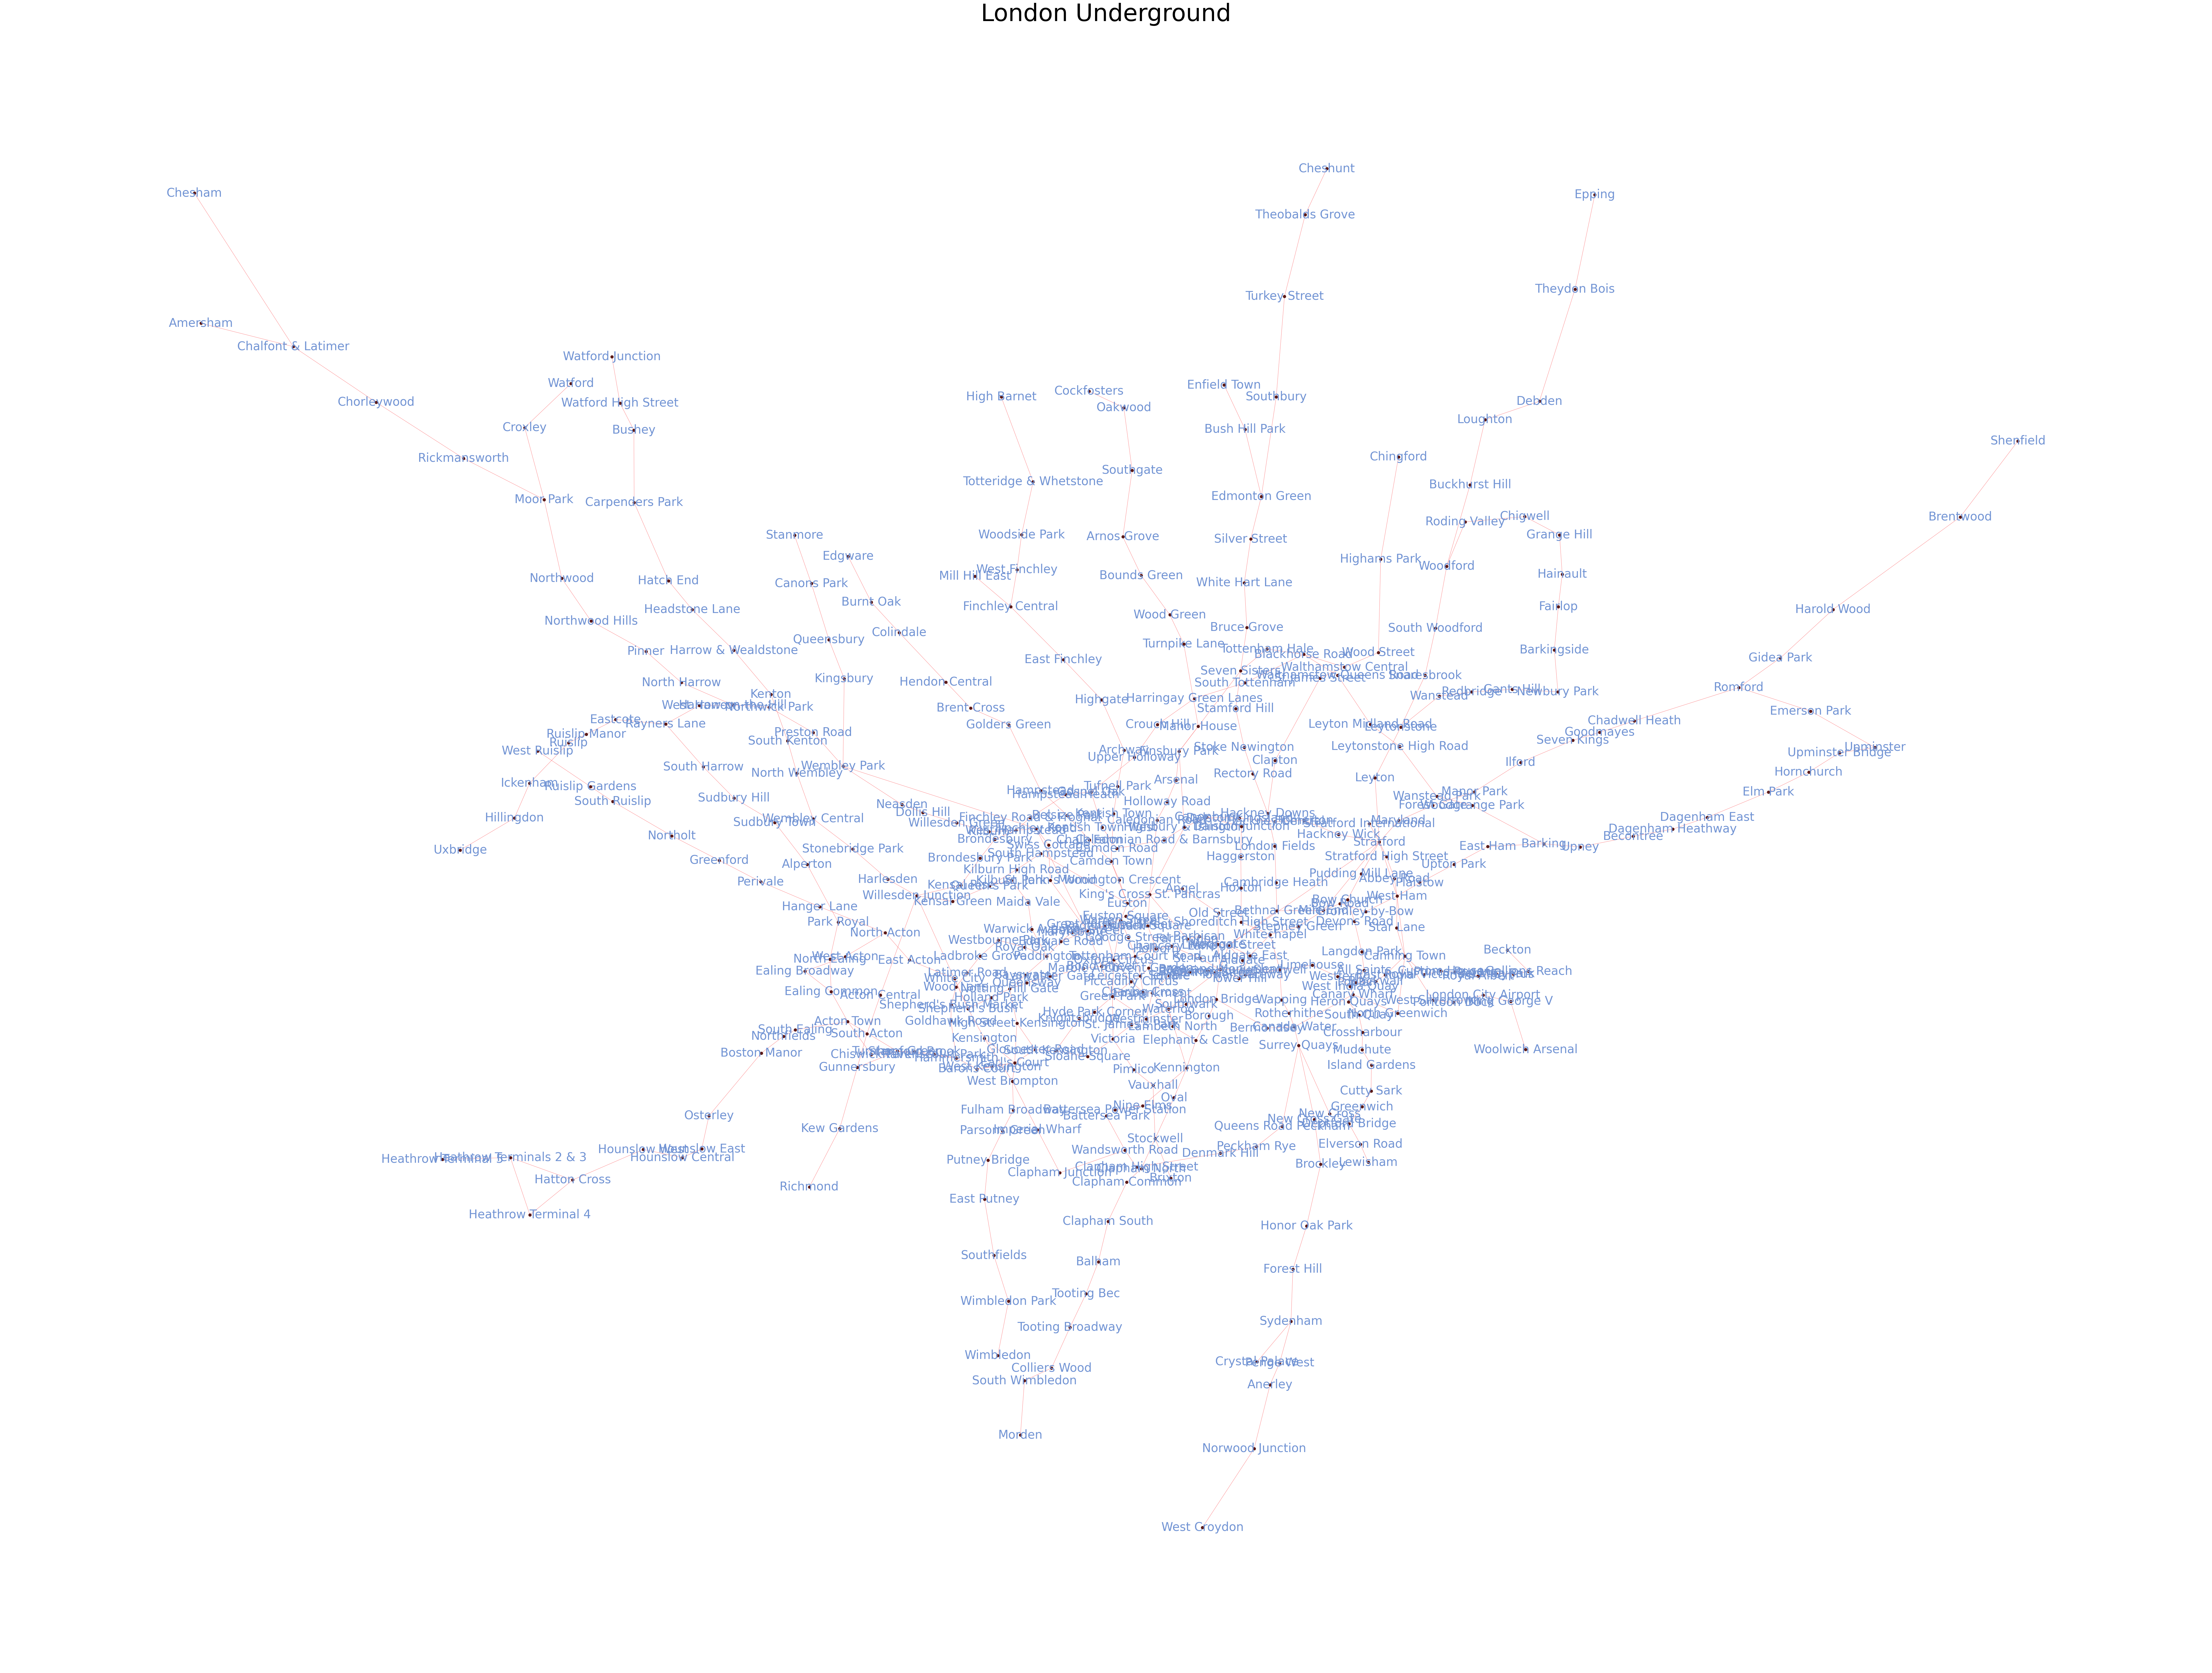

In [13]:
fig, ax = plt.subplots(figsize=(100,75))

node_labels = {node: node for node in london_graph.nodes()}
pos = nx.get_node_attributes(london_graph, 'coords')

nx.draw_networkx_nodes(london_graph, pos, node_size=50, node_color=gbp_colors[2])
nx.draw_networkx_edges(london_graph, pos, arrows=False, width=0.6, edge_color=gbp_colors[1])
nx.draw_networkx_labels(london_graph, pos, node_labels, font_size=30, font_color=gbp_colors[7])

plt.title("London Underground",fontsize=60)
plt.axis("off")
plt.show()

In [14]:
network_df = nx.to_pandas_edgelist(london_graph)

In [15]:
network_df.head()

source         target       length     line_name  flows
0  Wembley Park      Kingsbury  2916.771558       Jubilee  12356
1  Wembley Park        Neasden  2353.165938       Jubilee   6744
2  Wembley Park   Preston Road  1419.735166  Metropolitan  36600
3  Wembley Park  Finchley Road  7266.373927  Metropolitan  55215
4     Kingsbury     Queensbury  1245.995234       Jubilee   9419

### 1.1.1 Calculate Three Centrality Measures
degree, betweenness / delta, closeness

In [16]:
degree_centrality = nx.degree_centrality(london_graph)

nx.set_node_attributes(london_graph,dict(degree_centrality),'degree_centrality')


# To dataframe using the nodes as the index
df_deg = pd.DataFrame(index=london_graph.nodes())

#
df_deg['degree_centrality'] = pd.Series(nx.get_node_attributes(london_graph, 'degree_centrality'))

df_deg_sorted = df_deg.sort_values(["degree_centrality"], ascending=False)
df_deg_sorted[0:10]

degree_centrality
Stratford                            0.0225
Bank and Monument                    0.0200
Baker Street                         0.0175
King's Cross St. Pancras             0.0175
Green Park                           0.0150
Liverpool Street                     0.0150
Oxford Circus                        0.0150
Earl's Court                         0.0150
West Ham                             0.0150
Canning Town                         0.0150

In [17]:
df_deg_sorted
# convert index to column
df_deg_sorted.reset_index(level=0, inplace=True)
df_deg_sorted.rename(columns = {'index':'station_name'}, inplace = True)

In [18]:
df_deg_sorted.to_csv('degree_centrality.csv')

In [19]:
# save column to a list:df_deg['degree_centrality']
df_deg_sorted['degree_centrality'].max()

0.0225

In [31]:
betweenness_centrality = nx.betweenness_centrality(london_graph)
nx.set_node_attributes(london_graph,dict(betweenness_centrality),'betweenness_centrality')
# To dataframe using the nodes as the index
df_bet = pd.DataFrame(index=london_graph.nodes())
df_bet ['betweenness_centrality'] = pd.Series(nx.get_node_attributes(london_graph, 'betweenness_centrality'))
df_bet_sorted = df_bet.sort_values(["betweenness_centrality"], ascending=False)
df_bet_sorted[0:10]

betweenness_centrality
Stratford                               0.297846
Bank and Monument                       0.290489
Liverpool Street                        0.270807
King's Cross St. Pancras                0.255307
Waterloo                                0.243921
Green Park                              0.215835
Euston                                  0.208324
Westminster                             0.203335
Baker Street                            0.191568
Finchley Road                           0.165085

In [21]:
# function to calculate the delta centrality defined in our lecture.
def delta_calc(input_graph):
    """
     
    """
    
    delta_centrality = {}
    
    original_efficiency = nx.global_efficiency(input_graph)

    for node in input_graph.nodes():
        
        graph_copy = copy.deepcopy(input_graph)
            
        graph_copy.remove_node(node)

        # Calculate the efficiency of the graph after removing the node
        removed_efficiency = nx.global_efficiency(graph_copy)

        # Calculate information centrality
        delta_centrality[node] = (original_efficiency - removed_efficiency) / original_efficiency

    return delta_centrality

In [22]:
delta_centrality = delta_calc(london_graph)
# add back to graph
nx.set_node_attributes(london_graph,dict(delta_centrality),'delta_centrality')
sorted_delta = sorted(delta_centrality.items(), key=lambda x: x[1], reverse=True)

__Delta centrality defined in our module__

In [32]:
df_delta = pd.DataFrame(sorted_delta, columns=['Station', 'Delta_Centrality'])
df_delta = df_delta.set_index('Station')

In [24]:
df_delta.head(10)

Delta_Centrality
Station                             
Stratford                   0.121858
Euston                      0.091412
Camden Town                 0.071379
Leyton                      0.067141
Leytonstone                 0.062154
Canning Town                0.057365
Willesden Junction          0.052124
Finsbury Park               0.046411
Surrey Quays                0.045374
Wembley Park                0.044668

In [25]:
# add the delta_centrality back to the graph
nx.set_node_attributes(london_graph, delta_centrality, 'delta_centrality')

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


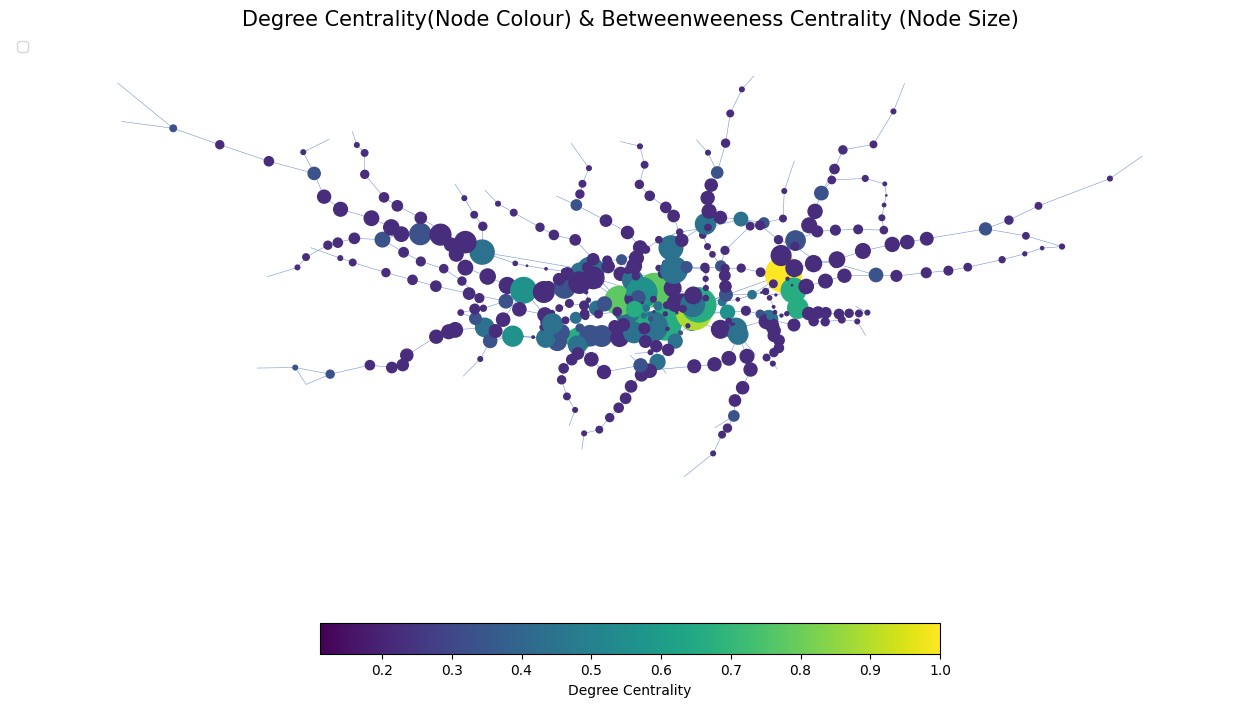

In [26]:
# visualize the degree and betweenness centrality
degree_centrality_values=list(map(lambda i: i[1]['degree_centrality'], london_graph.nodes(data=True)))

max_degree = df_deg_sorted['degree_centrality'].max()
# Viz #1
node_colour =list(map(lambda i: i[1]['degree_centrality'] / max_degree, london_graph.nodes(data=True)))
# use size to represet between centrality:
node_size = list(map(lambda i: (i[1]['betweenness_centrality'] / max_degree) * 50, london_graph.nodes(data=True)))


fig, ax = plt.subplots(figsize=(16,9))

pos = nx.get_node_attributes(london_graph, 'coords')

nx.draw_networkx_edges(london_graph, pos, edge_color=gbp_colors[7], 
        width=0.4)

nodes = nx.draw_networkx_nodes(london_graph,
        pos = pos,
        node_color= node_colour,
        node_size= node_size)

plt.colorbar(nodes,
             label="Degree Centrality",
             orientation="horizontal", 
             shrink=0.5)
# add legend for size of nodes
plt.legend(numpoints=1, loc='upper left')    

plt.axis("off")
plt.title("Degree Centrality(Node Colour) & Betweenweeness Centrality (Node Size)",fontsize=15)
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


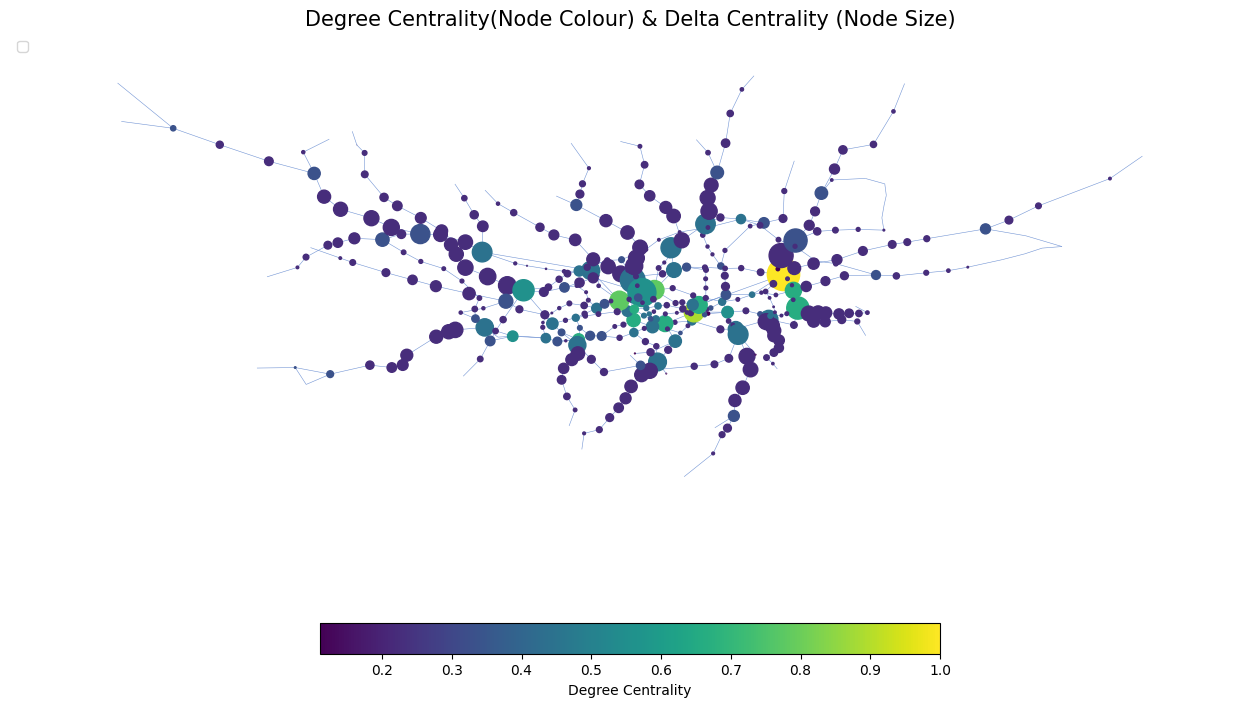

In [27]:
# visualize the degree and betweenness centrality
degree_centrality_values=list(map(lambda i: i[1]['degree_centrality'], london_graph.nodes(data=True)))

max_degree = df_deg_sorted['degree_centrality'].max()


# Viz 2:
node_size =list(map(lambda i: i[1]['delta_centrality'] / max_degree *100, london_graph.nodes(data=True)))
node_colour= list(map(lambda i: (i[1]['degree_centrality'] / max_degree), london_graph.nodes(data=True)))



fig, ax = plt.subplots(figsize=(16,9))

pos = nx.get_node_attributes(london_graph, 'coords')

nx.draw_networkx_edges(london_graph, pos, edge_color=gbp_colors[7], 
        width=0.4)

nodes = nx.draw_networkx_nodes(london_graph,
        pos = pos,
        node_color= node_colour,
        node_size= node_size)

plt.colorbar(nodes,
             label="Degree Centrality",
             orientation="horizontal", 
             shrink=0.5)
# add legend for size of nodes
plt.legend(numpoints=1, loc='upper left')    

plt.axis("off")
plt.title("Degree Centrality(Node Colour) & Delta Centrality (Node Size)",fontsize=15)
plt.show()

In [28]:
closeness_centrality = nx.closeness_centrality(london_graph)
nx.set_node_attributes(london_graph,dict(closeness_centrality),'closeness_centrality')
# To dataframe using the nodes as the index
df_close = pd.DataFrame(index=london_graph.nodes())
df_close['closeness_centrality'] = pd.Series(nx.get_node_attributes(london_graph, 'closeness_centrality'))
df_close_sorted = df_close.sort_values(["closeness_centrality"], ascending=False)
df_close_sorted[0:10]

closeness_centrality
Green Park                            0.114778
Bank and Monument                     0.113572
King's Cross St. Pancras              0.113443
Westminster                           0.112549
Waterloo                              0.112265
Oxford Circus                         0.111204
Bond Street                           0.110988
Farringdon                            0.110742
Angel                                 0.110742
Moorgate                              0.110314

## 1.2 Impact Measures
Find 2 different measures to evaluate the impact of the node removal on the network. These need to 
be global measures referring to the whole network and not to specific nodes or links. Explain whether 
these two measures are specific to the London underground, or whether they could also be used to 
evaluate the resilience of any other network.
  
https://www.youtube.com/watch?v=P0PBsRASneU

In [29]:
 #We can print the dataframe from the shapefile to check the data
df_edge = nx.to_pandas_edgelist(london_graph)
df_edge[0:20]

source                   target       length           line_name  \
0   Wembley Park                Kingsbury  2916.771558             Jubilee   
1   Wembley Park                  Neasden  2353.165938             Jubilee   
2   Wembley Park             Preston Road  1419.735166        Metropolitan   
3   Wembley Park            Finchley Road  7266.373927        Metropolitan   
4      Kingsbury               Queensbury  1245.995234             Jubilee   
5     Queensbury              Canons Park  1693.307343             Jubilee   
6    Canons Park                 Stanmore  1419.669476             Jubilee   
7      Stratford                 West Ham  1673.509515             Jubilee   
8      Stratford    Stratford High Street   519.300074                 DLR   
9      Stratford        Pudding Mill Lane  1137.033257                 DLR   
10     Stratford  Stratford International  1321.068117                 DLR   
11     Stratford         Liverpool Street  6698.461270            TfL Rail   
12     Stratford                 Maryland   951.304721            TfL Rail   
13     Stratford                 Mile End  2805.001392             Central   
14     Stratford                   Leyton  2131.342926             Central   
15     Stratford             Hackney Wick  1572.923279   London Overground   
16      West Ham             Canning Town  1695.080746             Jubilee   
17      West Ham               Abbey Road   533.842422                 DLR   
18      West Ham                Star Lane   863.651663                 DLR   
19      West Ham           Bromley-by-Bow  1212.245543  Hammersmith & City   

     flows  
0    12356  
1     6744  
2    36600  
3    55215  
4     9419  
5     6385  
6     3624  
7    91911  
8     1484  
9     4606  
10    3833  
11  160275  
12   34442  
13    6285  
14   56082  
15    9891  
16   60452  
17     601  
18    1038  
19    4266

In [ ]:
#if want to know what is the maximum distance between stations
max_dist=max({weight for e1, e2, weight in london_graph.edges(data='length')})

#This distance in given in meters
#if want to know the name of stations which are further away from each other
furthest_stat = [(d['station_1_'],d['station_2_']) for  u,v,d in london_graph.edges(data=True) if d['length'] == max_dist]

#if want to know to which stations Baker Street is directly connected to
Baker_Street = [(d['station_1_'],d['station_2_']) for  u,v,d in london_graph.edges(data=True) if d['station_1_'] == 'Baker Street'or d['station_2_'] == 'Baker Street']
(max_dist,furthest_stat,Baker_Street)

Largest Connected Component (LCC): This measures the size of the largest remaining connected subgraph after node removal. A smaller LCC indicates a more fragmented network.
  
Efficiency: This measures the average shortest path length between all pairs of nodes in the network. A lower efficiency indicates longer paths and reduced connectivity.

### 1.2.1 Measure 1: Network Efficiency

_Def:_


This measure ranges from [] 

 <p style="color:red">(literature to support this)</p>


_Nodal Removal Impact:_

Expected:

Observed:


_London Underground Network Context:_ In the context of a metro network like the London Underground, LLC represents the number of stations in the largest cluster of interconnected nodes within the network.  

### 1.2.2 Measure 2: Size of LLC

_Def:_
It represents the number of nodes in the largest cluster of interconnected nodes within the network.
This measure is an __integer__ as it simply reflects the total number of nodes that remain connected in the largest group after any changes or node removals. 
It's a key measure in network analysis because it shows how cohesive and connected the network remains under various conditions, such as the removal of critical nodes. <p style="color:red">(literature to support this)</p>


_Nodal Removal Impact:_

Expected:

Observed:


_London Underground Network Context:_ In the context of a metro network like the London Underground, LLC represents the number of stations in the largest cluster of interconnected nodes within the network.  


1.2.1 Measure 1: Network Efficiency

Definition:
Network efficiency is a measure of the inverse of the average shortest path length in a network. It evaluates how efficiently information or resources flow across the network. Mathematically, it is defined as the average of the inverse of the shortest path lengths between each pair of nodes:

E=1n(n−1)∑i≠j1d(i,j)E=n(n−1)1​∑i=j​d(i,j)1​

where d(i,j)d(i,j) is the shortest path distance between nodes ii and jj, and nn is the number of nodes in the network.

Range: This measure ranges from 0 to 1, where 0 indicates no connectivity at all, and 1 represents perfect efficiency with direct connectivity between all pairs of nodes.
<p style="color:red">(Add literature to support the validity and use of this measure in network analysis)</p>

Nodal Removal Impact:
Expected: Removal of nodes, especially those with high centrality, is expected to decrease network efficiency as the average path length within the network increases.
Observed: (Describe the actual observed change in network efficiency after node removal, based on your data or simulations.)

London Underground Network Context:
In the context of a metro network like the London Underground, network efficiency helps understand how disruptions affect the overall travel times and connectivity. Lower efficiency implies longer travel times and potentially more transfers, affecting the network's service quality.
1.2.2 Measure 2: Size of Largest Connected Component (LCC)

Definition:
The Largest Connected Component (LCC) represents the number of nodes in the largest cluster of interconnected nodes within the network. It is an integer value reflecting the total number of nodes that remain connected in the largest group after any changes or node removals. It's a fundamental measure in network analysis, showing how cohesive and connected the network remains under various conditions, such as the removal of critical nodes.
<p style="color:red">(Add literature to support the significance of LCC in assessing network resilience and integrity.)</p>

Nodal Removal Impact:
Expected: The removal of highly connected or centrally located nodes is expected to reduce the size of the LCC, indicating a more fragmented network which could compromise its functionality.
Observed: (Describe the actual observed change in the size of the LCC after node removal, based on your data or simulations.)

London Underground Network Context:
In the context of a metro network like the London Underground, the size of the LCC is crucial for determining how well the network can function in the face of disruptions. A significant decrease in the LCC size after removing key stations would indicate a reduction in the network's ability to provide comprehensive and efficient service across the city.

This completion provides a structured and informative presentation of the chosen measures, their expected and observed impacts upon node removal, and their specific relevance to the London Underground. Make sure to include citations from reliable sources to back up your definitions and the expected impacts, which will enhance the credibility of your analysis.

## 1.3 Node Removal
For each of the centrality measures selected in I.1. remove at least 10 nodes following two different 
strategies. A) Non-sequential removal: using the table created in I.1. remove 1 node at a time 
following the rank in the table, i.e. from the most important one to the 10

th most important one. After 
each removal, evaluate the impact of the removal using your two measures in I.2. and proceed until 
you have removed at least 10 nodes. B) Sequential: remove the highest ranked node and evaluate the 
impact using the 2 measures. After removal, re-compute the centrality measure. Remove the highest 
ranked node in the new network and evaluate the impact. Continue until removing at least 10 nodes. 

Report the results of the 2 strategies in one plot, and critically discuss the following: which centrality 
measure reflects better the importance of a station for the functioning of the underground, which 
strategy is more effective at studying resilience, and which impact measure is better at assessing the 
damage after node removal.  

In [33]:
#degree_centrality:
degree_sorted_nodes = sorted(degree_centrality.items(), key=lambda item: item[1], reverse=True)


# betweeness_centrality:
betweenness_sorted_nodes = sorted(betweenness_centrality.items(), key=lambda item: item[1], reverse=True)

# delta_centrality:
delta_sorted_nodes = sorted(delta_centrality.items(), key=lambda item: item[1], reverse=True)

# top nodes:
top_num = 15
degree_top_nodes= [node for node, _ in degree_sorted_nodes[:top_num]]
betweenness_top_nodes= [node for node, _ in betweenness_sorted_nodes[:top_num]]
delta_top_nodes= [node for node, _ in delta_sorted_nodes[:top_num]]


hold up, why not putting them in one function!

In [34]:
centrality_measure_list = [degree_centrality, betweenness_centrality, delta_centrality]

__Largest Connected Component (LCC)__

This measures the size of the largest remaining connected subgraph after node removal. A smaller LCC indicates a more fragmented network.
    
    
__Efficiency__

This measures the average shortest path length between all pairs of nodes in the network. A lower efficiency indicates longer paths and reduced connectivity.

In [35]:
def non_seq_remove_top_nodes(input_graph, centrality_node_list, n):
    """
    This function removes the top nodes from the graph

    input_graph: networkx graph
    centrality_node_list: centrality measure
    n_top_nodes: number of nodes to remove

    return: results - dict of results for plotting and analysis.
        results = {
            'non_seq_remove': list of nodes removed in non-sequential order
            'global_efficiency_sq': list of global efficiency after each node removal
            'number_of_connected_components_sq': list of number of connected components after each node removal
            }

    """
    #####################################    non-sequential removal  #####################################  
    # init dict to store results
    results = {
    'non_seq_remove': [],
    'global_efficiency_nsq': [],
    'size_lcc_nsq': []
    }

    # sort nodes by selected centrality measure
    sorted_nodes = sorted(centrality_node_list.items(), key=lambda item: item[1], reverse=True)
    # sequential removal, top n nodes:
    top_n_nodes = [node for node, _ in sorted_nodes[:n]]
    
    # non-seq copy
    non_seq_graph_copy = copy.deepcopy(input_graph)

    # Calculate global efficiency and number of connected components for non-seq removal:
    for node in top_n_nodes:
        # remove top n nodes
        non_seq_graph_copy.remove_node(node)
        #print(f"Node {node} removed")
        
        # Calculate global efficiency
        efficiency = nx.global_efficiency(non_seq_graph_copy)
        #print(f"Efficiency: {efficiency}")

        # Calculate the lcc
        lcc = len(max(nx.connected_components(non_seq_graph_copy), key=len))
        #print(f"LLC: {lcc}")

        # Append the results
        results['non_seq_remove'].append(node)
        results['global_efficiency_nsq'].append(efficiency)
        results['size_lcc_nsq'].append(lcc)

    return results
######################################################################################################

def seq_remove_top_nodes(input_graph, n, cent_measure):
    """
    This function removes the top nodes from the graph in sequential order

    input_graph: networkx graph
    centrality_node_list: centrality measure

    return: results - dict of results for plotting and analysis.
        results = {
            'seq_remove': list of nodes removed in sequential order
            'global_efficiency_sq': list of global efficiency after each node removal
            'number_of_connected_components_sq': list of number of connected components after each node removal
            }

    """

    ########################################    sequential removal  ######################################

    results = {
        'seq_remove': [],
        'global_efficiency_sq': [],
        'size_lcc_sq': []
    }

    graph_copy = copy.deepcopy(input_graph)

    for i in range(n):
    # sort nodes by selected centrality measure:
        if cent_measure == 'degree':
            centrality = nx.degree_centrality(graph_copy)

        elif cent_measure == 'between':
            centrality = nx.betweenness_centrality(graph_copy)
        
        elif cent_measure == 'delta':
            centrality = delta_calc(graph_copy) 
        else:
            print("invalid selection of centrality measure")
        
        # Sort nodes by centrality and select the node with the highest score
        sorted_nodes = sorted(centrality.items(), key=lambda item: item[1], reverse=True)
        node_to_remove = sorted_nodes[0][0]  # Get the node (first element of the tuple)
        print(f"Node {node_to_remove} removed")

        # Log the node and remove it from the graph
        results['seq_remove'].append(node_to_remove)
        graph_copy.remove_node(node_to_remove)

        # Recalculate and store global efficiency and LCC size
        efficiency = nx.global_efficiency(graph_copy)
        lcc = len(max(nx.connected_components(graph_copy), key=len))
        results['global_efficiency_sq'].append(efficiency)
        results['size_lcc_sq'].append(lcc)

    ######################################################################################################
    return results

In [36]:
#test_res = non_seq_remove_top_nodes(london_graph, degree_centrality, 10)
#test_res = seq_remove_top_nodes(london_graph, 10, 'degree')
#num_node_drop = 20
num_node_drop = 100
# degree
deg_nsq = non_seq_remove_top_nodes(london_graph, degree_centrality, num_node_drop)
deg_sq = seq_remove_top_nodes(london_graph, num_node_drop, 'degree')

# betweenness
bet_nsq = non_seq_remove_top_nodes(london_graph, betweenness_centrality, num_node_drop)
bet_sq = seq_remove_top_nodes(london_graph, num_node_drop, 'between')

# delta
del_nsq = non_seq_remove_top_nodes(london_graph, delta_centrality, num_node_drop)
del_sq = seq_remove_top_nodes(london_graph, num_node_drop, 'delta')

Node Stratford removed
Node Bank and Monument removed
Node Baker Street removed
Node King's Cross St. Pancras removed
Node Canning Town removed
Node Green Park removed
Node Earl's Court removed
Node Waterloo removed
Node Turnham Green removed
Node Willesden Junction removed
Node Oxford Circus removed
Node Wembley Park removed
Node West Ham removed
Node Canary Wharf removed
Node West Hampstead removed
Node Shadwell removed
Node Poplar removed
Node Notting Hill Gate removed
Node Paddington removed
Node Liverpool Street removed
Node Camden Town removed
Node Stockwell removed
Node Leicester Square removed
Node Holborn removed
Node Finsbury Park removed
Node Surrey Quays removed
Node Blackhorse Road removed
Node London Bridge removed
Node Hammersmith removed
Node Acton Town removed
Node South Kensington removed
Node West Brompton removed
Node Victoria removed
Node Embankment removed
Node Whitechapel removed
Node Mile End removed
Node Barking removed
Node Rayners Lane removed
Node Harrow-on-

### 1.3.1. Degree Non-seq vs Seq Removal:

In [34]:
def normalize_values(values):
    max_val = 500
    min_val = 300
    normalized = [(x - min_val) / (max_val - min_val) for x in values]
    return normalized

# Example usage
test_values = [300, 400, 500]  # Sample data
normalized_values = normalize_values(test_values)

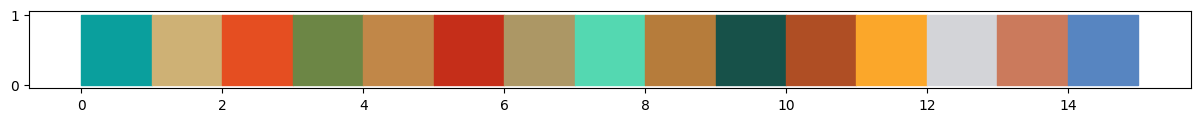

In [35]:
# Now let's plot color pallette
plt.figure(figsize=(15, 1))
for i, color in enumerate(asteroid_city_col):
    plt.fill_between([i, i + 1], 0, 1, color=color)

for all seq vs. non-seq grapph plots:

In [36]:
def seq_vs_non_seq_plot(nsq_res, sq_res, centrality_selection):
    # plot degree centrality non-sequential vs. sequential
    fig, ax = plt.subplots(2, 2, figsize=(16, 12))

    #plt.plot(deg_nsq['global_efficiency_nsq'], label='Degree Centrality Non-Sequential', color=asteroid_city_col[0])

    #plt.plot(deg_sq['global_efficiency_sq'], label='Degree Centrality Sequential', color=asteroid_city_col[1])
    # Plot Global Efficiency on the first subplot
    
    ax[0,0].plot( nsq_res['non_seq_remove'], nsq_res['global_efficiency_nsq'],
             label=centrality_selection + ' Non-Sequential', color=asteroid_city_col[0])
    ax[0,0].set_title("Global Efficiency Non-Sequential", fontsize=15)
    ax[0,0].set_xlabel("Nodes Removed")
    ax[0,0].set_ylabel("Global Efficiency")
    ax[0,0].tick_params(axis='x', rotation=90)
    ax[0,0].legend()

    ax[0,1].plot(nsq_res['non_seq_remove'], nsq_res['size_lcc_nsq'], 
             label= centrality_selection + ' Non-Sequential', color=asteroid_city_col[1])
    ax[0,1].set_title("LLC Size Non-Sequential", fontsize=15)
    ax[0,1].set_xlabel("Nodes Removed")
    ax[0,1].set_ylabel("LLC Size")
    ax[0,1].tick_params(axis='x', rotation=90)
    ax[0,1].legend()

    ax[1,0].plot( sq_res['seq_remove'], sq_res['global_efficiency_sq'],
             label=centrality_selection + ' Sequential', color=asteroid_city_col[2])
    ax[1,0].set_title("Global Efficiency Sequential", fontsize=15)
    ax[1,0].set_xlabel("Nodes Removed")
    ax[1,0].set_ylabel("Global Efficiency")
    ax[1,0].tick_params(axis='x', rotation=90)
    ax[1,0].legend()

    
    ax[1,1].plot(sq_res['seq_remove'], sq_res['size_lcc_sq'], 
             label= centrality_selection + ' Sequential', color=asteroid_city_col[3])
    ax[1,1].set_title("LLC Size Sequential", fontsize=15)
    ax[1,1].set_xlabel("Nodes Removed")
    ax[1,1].set_ylabel("LLC Size")
    ax[1,1].tick_params(axis='x', rotation=90)
    ax[1,1].legend()
    # plt.plot(deg_nsq['size_lcc_nsq'], label='Degree Centrality Non-Sequential', color=asteroid_city_col[2])

    # plt.plot(deg_sq['size_lcc_sq'], label='Degree Centrality Sequential', color=asteroid_city_col[4])

    # plt.title("Degree Centrality: Global Efficiency & Size of Largest Connected Component", fontsize=15)

    # plt.xlabel("Number of Nodes Removed")

    # plt.ylabel("Global Efficiency")

    # plt.legend()

    # plt.show()
    # Adjust layout to prevent overlap
    # well, the more I temper with x label the worse it looks
    # for axx in ax:
    #     labels = axx.get_xticklabels()  # Get x labels
    #     for i, label in enumerate(labels):
    #         if i % 3 == 0:  # Even index labels
    #             label.set_y(-0.05)  # Move even index labels up
    #         elif i % 3 == 1:  # Odd index labels
    #             label.set_y(-0.15)
    #         else:  # Odd index labels
    #             label.set_y(-0.25)  # Move odd index labels down
    #     axx.set_xticklabels(labels, rotation=0, ha="right") 
    plt.tight_layout()
    plt.show()


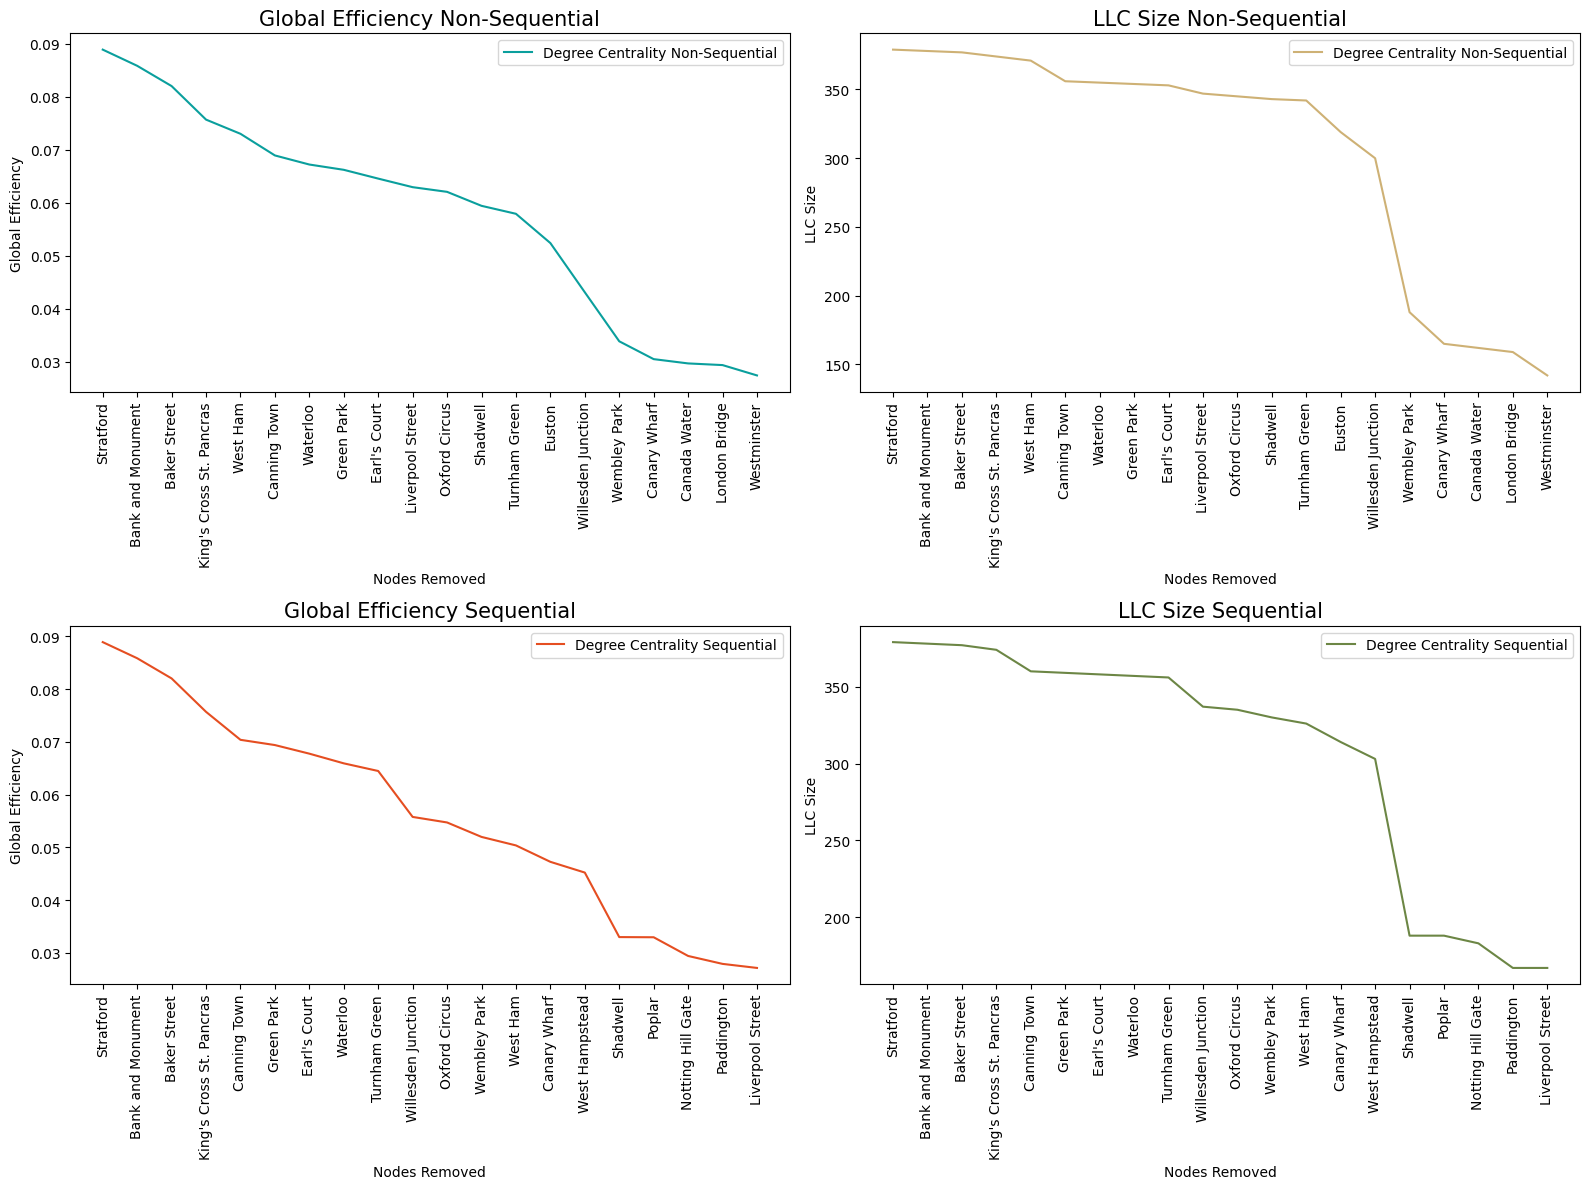

In [ ]:
# deg_nsq , deg_sq 
# bet_nsq, bet_sq
# del_nsq, del_sq

seq_vs_non_seq_plot(deg_nsq, deg_sq, 'Degree Centrality')

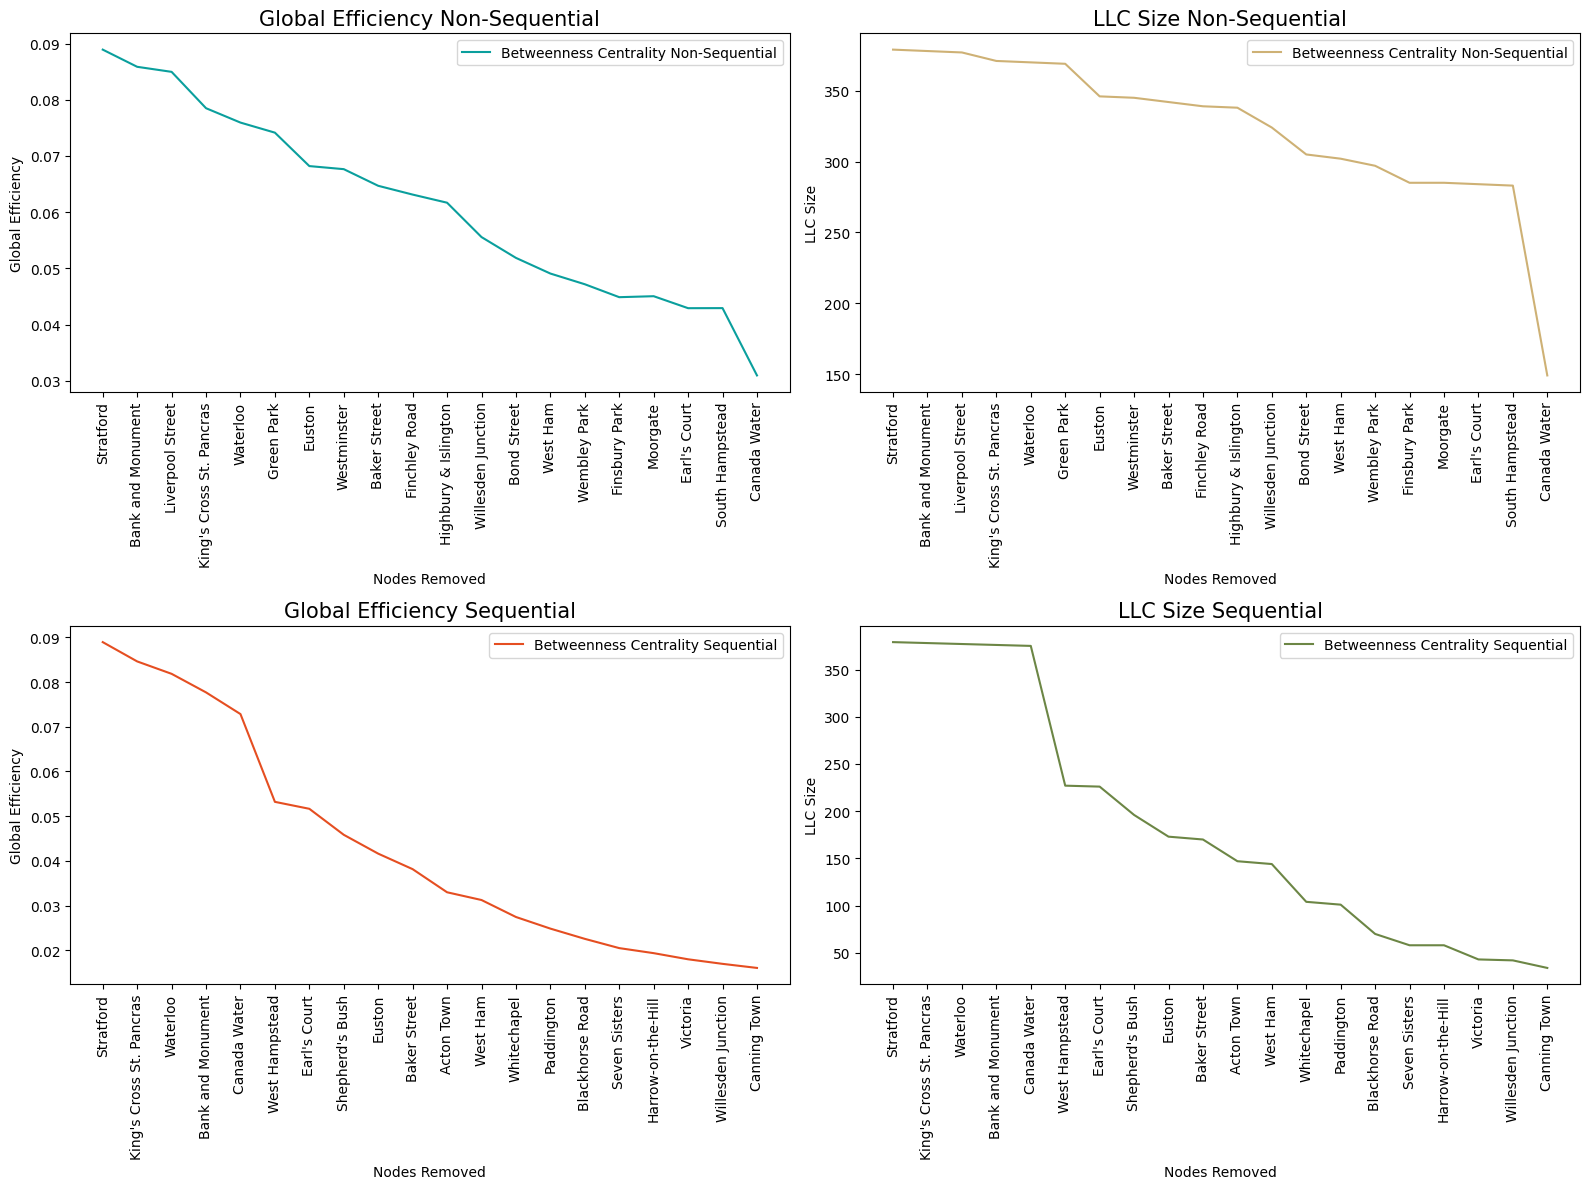

In [ ]:
seq_vs_non_seq_plot(bet_nsq, bet_sq, 'Betweenness Centrality')

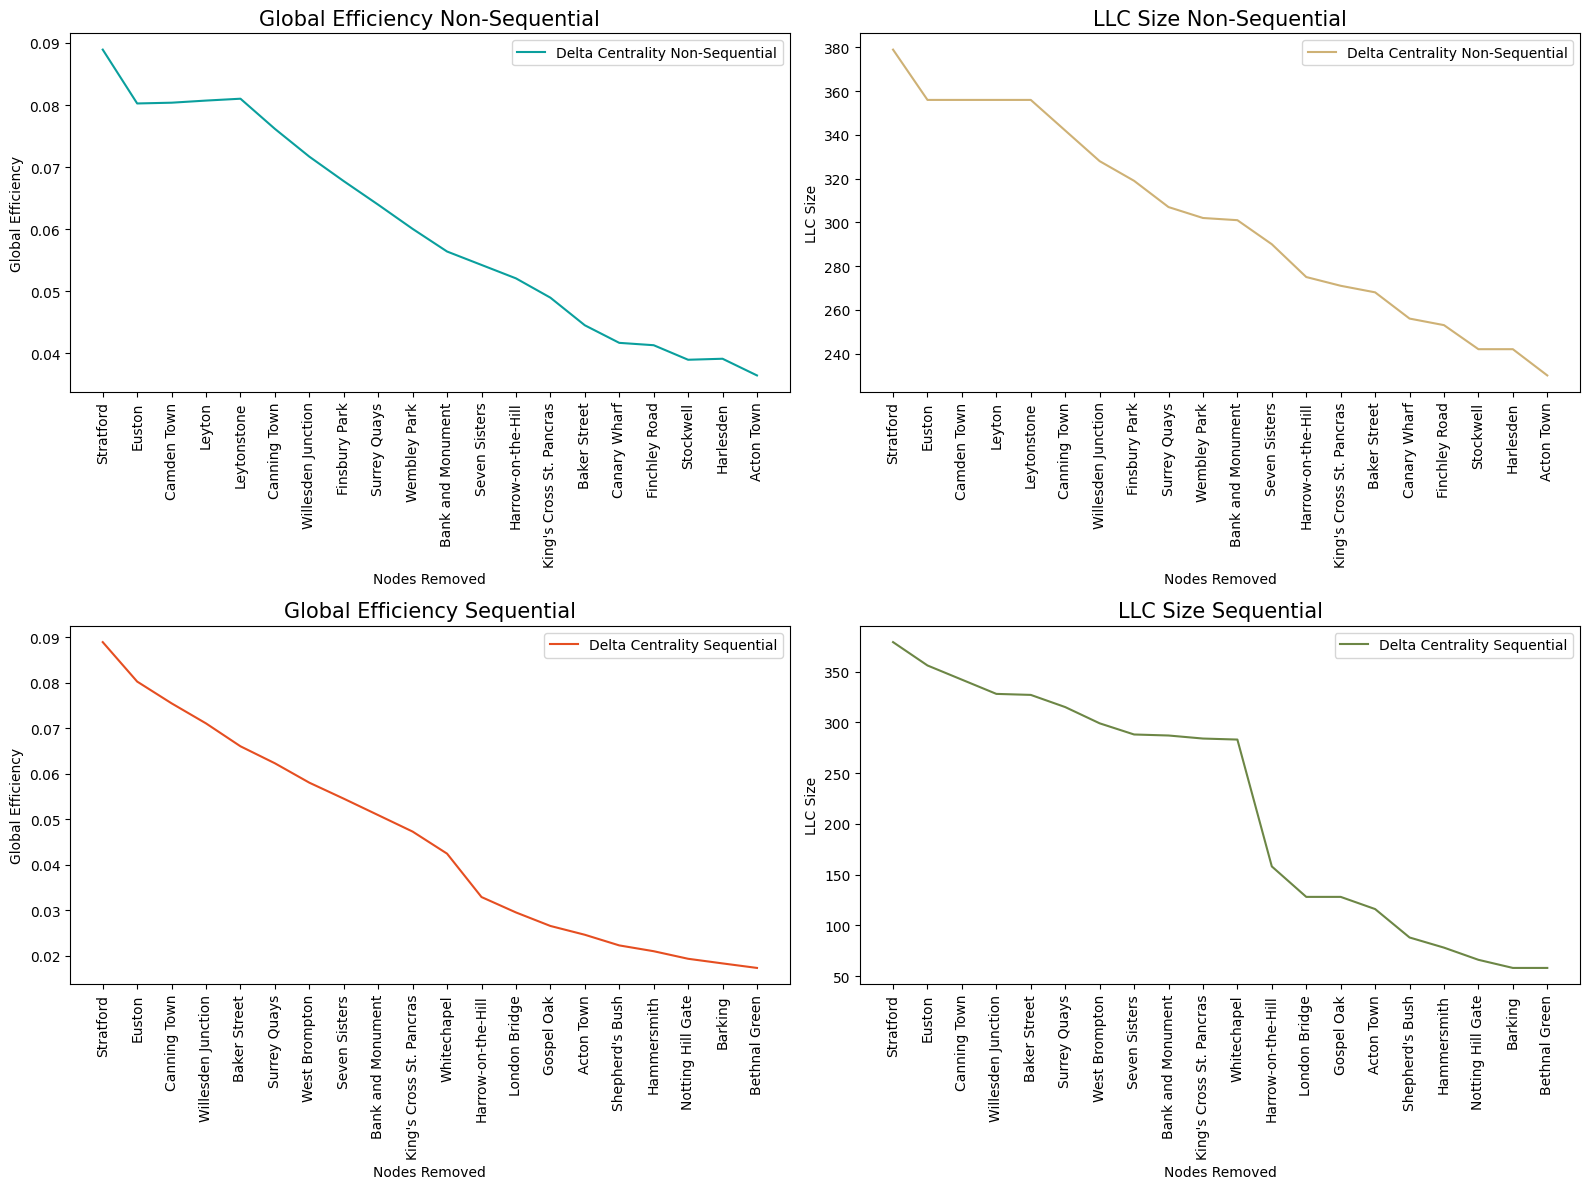

In [ ]:
seq_vs_non_seq_plot(del_nsq, del_sq, 'Delta Centrality')

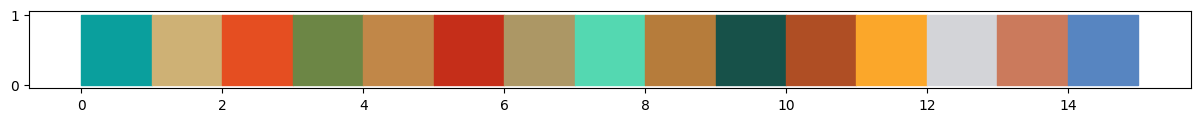

In [167]:
# Now let's plot color pallette
plt.figure(figsize=(15, 1))
for i, color in enumerate(asteroid_city_col):
    plt.fill_between([i, i + 1], 0, 1, color=color)

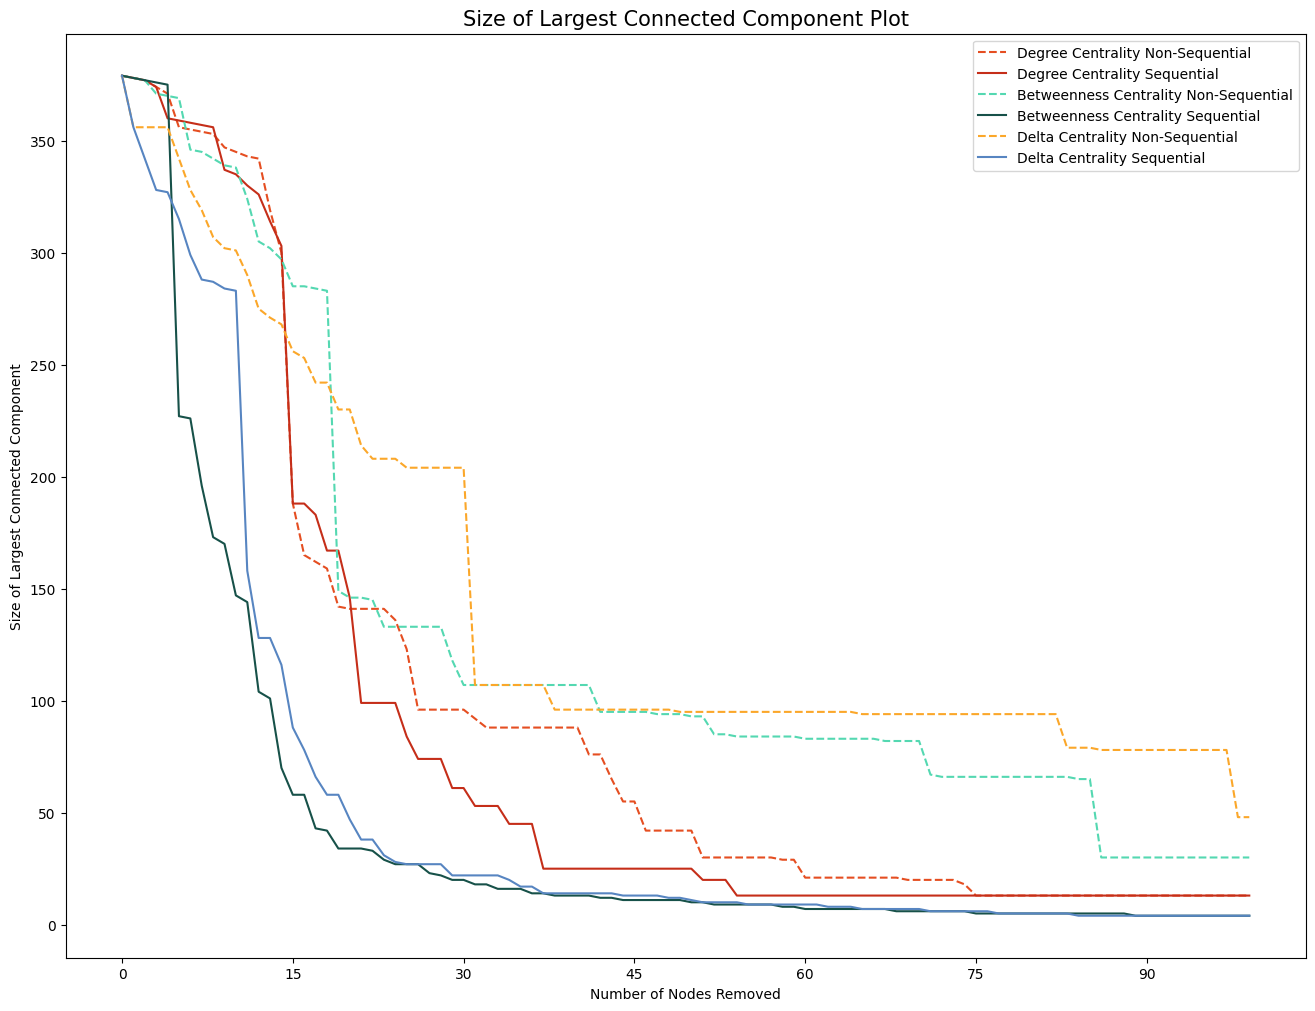

In [38]:
# deg_nsq , deg_sq 
# bet_nsq, bet_sq
# del_nsq, del_sq
#from matplotlib.ticker import MaxNLocator
# asteroid_city_col
fig, ax = plt.subplots(figsize=(16, 12))
plt.plot(deg_nsq['size_lcc_nsq'], label='Degree Centrality Non-Sequential', color=asteroid_city_col[2],linestyle='--')

plt.plot(deg_sq['size_lcc_sq'], label='Degree Centrality Sequential', color=asteroid_city_col[5])

plt.plot(bet_nsq['size_lcc_nsq'], label='Betweenness Centrality Non-Sequential', color=asteroid_city_col[7],linestyle='--')

plt.plot(bet_sq['size_lcc_sq'], label='Betweenness Centrality Sequential', color=asteroid_city_col[9])

plt.plot(del_nsq['size_lcc_nsq'], label='Delta Centrality Non-Sequential', color=asteroid_city_col[11],linestyle='--')

plt.plot(del_sq['size_lcc_sq'], label='Delta Centrality Sequential', color=asteroid_city_col[14])

plt.title("Size of Largest Connected Component Plot", fontsize=15)

plt.xlabel("Number of Nodes Removed")

plt.ylabel("Size of Largest Connected Component")
ax.xaxis.set_major_locator(MaxNLocator(integer=True))
plt.legend()

plt.show()

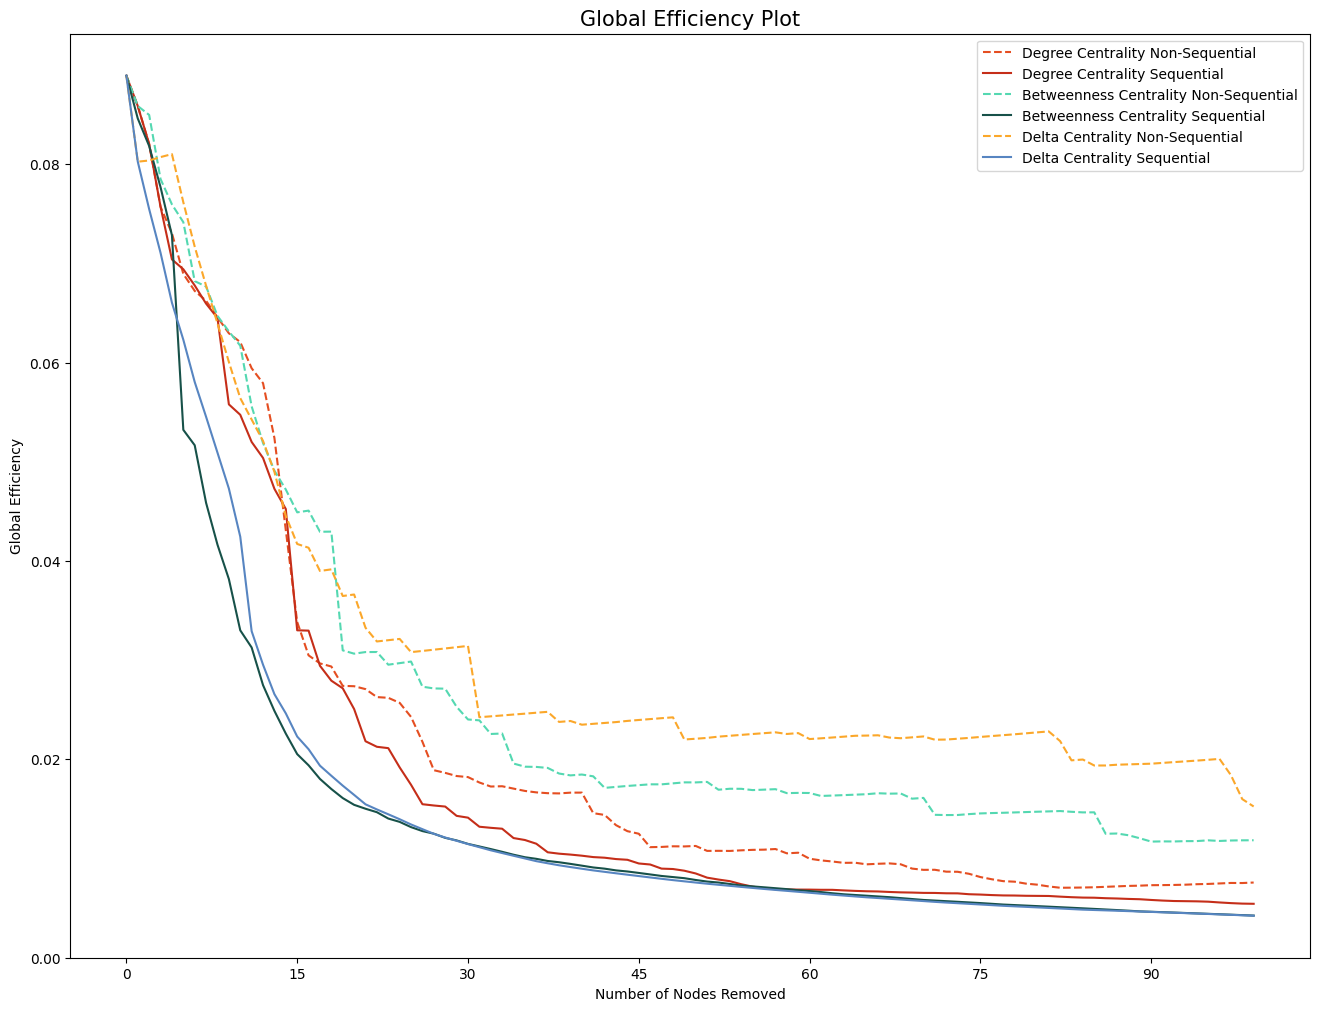

In [39]:
#asteroid_city_col
fig, ax = plt.subplots(figsize=(16, 12))
plt.plot(deg_nsq['global_efficiency_nsq'], label='Degree Centrality Non-Sequential', color=asteroid_city_col[2],linestyle='--')

plt.plot(deg_sq['global_efficiency_sq'], label='Degree Centrality Sequential', color=asteroid_city_col[5])

plt.plot(bet_nsq['global_efficiency_nsq'], label='Betweenness Centrality Non-Sequential', color=asteroid_city_col[7],linestyle='--')

plt.plot(bet_sq['global_efficiency_sq'], label='Betweenness Centrality Sequential', color=asteroid_city_col[9])

plt.plot(del_nsq['global_efficiency_nsq'], label='Delta Centrality Non-Sequential', color=asteroid_city_col[11],linestyle='--')

plt.plot(del_sq['global_efficiency_sq'], label='Delta Centrality Sequential', color=asteroid_city_col[14])

plt.title("Global Efficiency Plot", fontsize=15)

plt.xlabel("Number of Nodes Removed")

plt.ylabel("Global Efficiency")
ax.xaxis.set_major_locator(MaxNLocator(integer=True))
plt.legend()

plt.show()

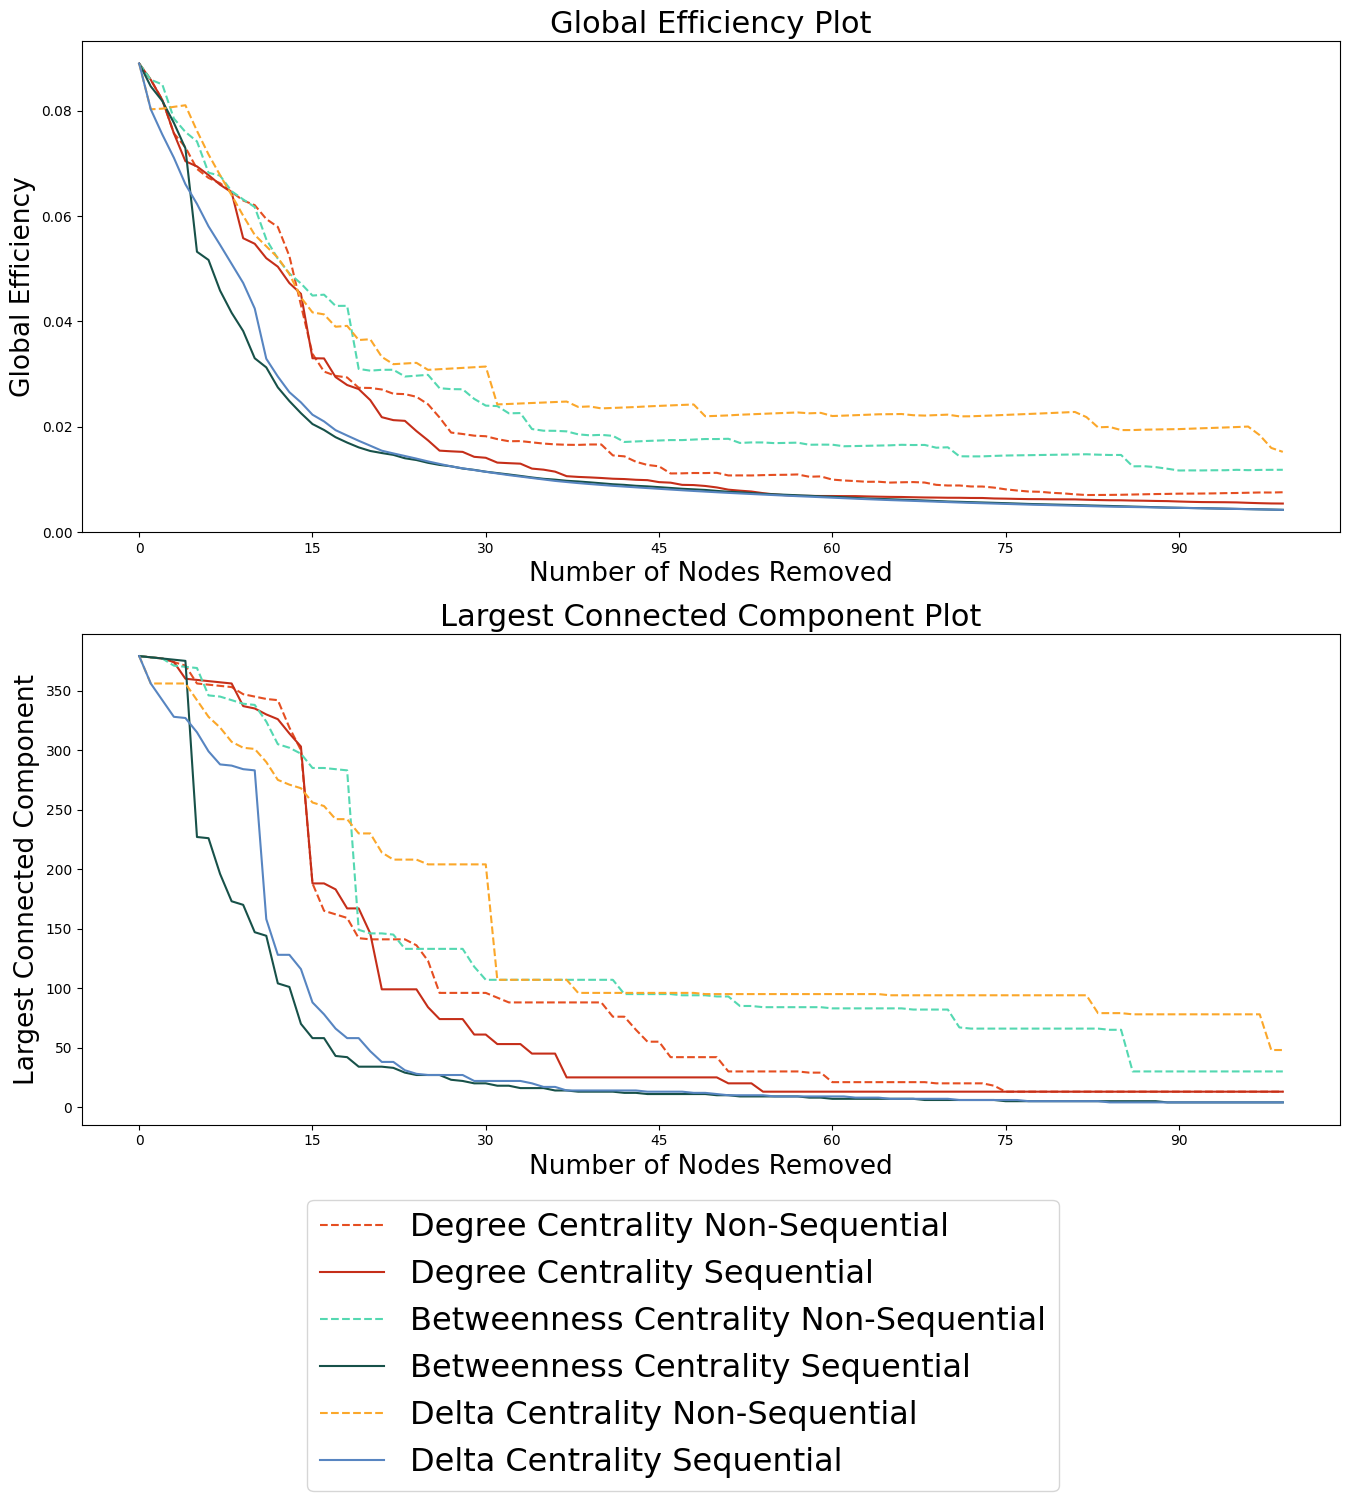

In [53]:
fig, ax = plt.subplots(2, 1, figsize=(16, 12))
plt.subplots_adjust(right=75)
ax[0].plot(deg_nsq['global_efficiency_nsq'], label='Degree Centrality Non-Sequential', color=asteroid_city_col[2],linestyle='--')

ax[0].plot(deg_sq['global_efficiency_sq'], label='Degree Centrality Sequential', color=asteroid_city_col[5])

ax[0].plot(bet_nsq['global_efficiency_nsq'], label='Betweenness Centrality Non-Sequential', color=asteroid_city_col[7],linestyle='--')

ax[0].plot(bet_sq['global_efficiency_sq'], label='Betweenness Centrality Sequential', color=asteroid_city_col[9])

ax[0].plot(del_nsq['global_efficiency_nsq'], label='Delta Centrality Non-Sequential', color=asteroid_city_col[11],linestyle='--')

ax[0].plot(del_sq['global_efficiency_sq'], label='Delta Centrality Sequential', color=asteroid_city_col[14])

ax[0].set_title("Global Efficiency Plot", fontsize=22)

ax[0].set_xlabel("Number of Nodes Removed", fontsize=19)

ax[0].set_ylabel("Global Efficiency", fontsize=19)
ax[0].xaxis.set_major_locator(MaxNLocator(integer=True))
#ax[0].legend(loc='upper right', bbox_to_anchor=(1, 1))

#
ax[1].plot(deg_nsq['size_lcc_nsq'], label='Degree Centrality Non-Sequential', color=asteroid_city_col[2],linestyle='--')

ax[1].plot(deg_sq['size_lcc_sq'], label='Degree Centrality Sequential', color=asteroid_city_col[5])

ax[1].plot(bet_nsq['size_lcc_nsq'], label='Betweenness Centrality Non-Sequential', color=asteroid_city_col[7],linestyle='--')

ax[1].plot(bet_sq['size_lcc_sq'], label='Betweenness Centrality Sequential', color=asteroid_city_col[9])

ax[1].plot(del_nsq['size_lcc_nsq'], label='Delta Centrality Non-Sequential', color=asteroid_city_col[11],linestyle='--')

ax[1].plot(del_sq['size_lcc_sq'], label='Delta Centrality Sequential', color=asteroid_city_col[14])

ax[1].set_title("Largest Connected Component Plot", fontsize=22)

ax[1].set_xlabel("Number of Nodes Removed", fontsize=19)

ax[1].set_ylabel("Largest Connected Component", fontsize=19)
ax[1].xaxis.set_major_locator(MaxNLocator(integer=True))
#ax[1].legend()


#plt.tight_layout()
#plt.show()
# Place a single legend outside the subplots
handles, labels = [], []
for a in ax:
    for h, l in zip(*a.get_legend_handles_labels()):
        if l not in labels:
            handles.append(h)
            labels.append(l)
# Define font size properties
#prop = {'size': 16}  

# create label
# fig.legend(handles, labels, loc='center right', bbox_to_anchor=(1.07, 0.5))
fig.legend(handles, labels, loc='lower center', bbox_to_anchor=(0.43, -0.26), fontsize=23)

plt.tight_layout(rect=[0, 0, 0.85, 1])  # Adjust the right margin to prevent cutting off subplots
plt.show()



## 2.1 Flows
Consider the centrality measure derived in I. <p style="color:cyan">indicating the most relevant stations for assessing 
the vulnerability of the underground.</p> What would you need to do to adjust this measure for a 
weighted network? 

Recompute the ranking of the 10 most important nodes according to this adjusted 
measure. Do you find the same ones as in I.1?  

In [70]:
graph_2 = nx.read_graphml('london_test.graph')


In [58]:
# convert str into tuple:
for node in graph_2.nodes():
    graph_2.nodes[node]['coords'] = eval(graph_2.nodes[node]['coords'])


In [64]:
#show one node:
list(graph_2.nodes(data = True))[0]

('Wembley Park', {'coords': (519316.5590174915, 186389.32981656672)})

In [93]:
# maximum of flows:
max_flow = max(nx.get_edge_attributes(graph_2, 'flows').values())
# get the minimum 2 values:
sorted(nx.get_edge_attributes(graph_2, 'flows').values())[0:30]
#min_flow = min(nx.get_edge_attributes(graph_2, 'flows').values())

[0,
 0,
 0,
 94,
 287,
 310,
 343,
 452,
 504,
 601,
 777,
 864,
 934,
 953,
 1038,
 1076,
 1090,
 1175,
 1181,
 1184,
 1184,
 1194,
 1211,
 1227,
 1262,
 1277,
 1330,
 1446,
 1482,
 1484]

In [91]:
max_flow

219499

In [196]:
# Compute weighted centrality measures
weighted_degree_centrality = nx.degree_centrality(graph_2)  # Use a version that supports weights if available
weighted_betweenness_centrality = nx.betweenness_centrality(graph_2, weight='flows')
weighted_closeness_centrality = nx.closeness_centrality(graph_2, distance='weight')


# Rank and identify the top 10 nodes for each weighted centrality measure
top_weighted_degree = sorted(weighted_degree_centrality.items(), key=lambda x: x[1], reverse=True)[:10]
top_weighted_betweenness = sorted(weighted_betweenness_centrality.items(), key=lambda x: x[1], reverse=True)[:10]
top_weighted_closeness = sorted(weighted_closeness_centrality.items(), key=lambda x: x[1], reverse=True)[:10]

In [82]:
# define a newweight attribute for graph, newweight is total  (1 + (flow/distance))*(deg(node)/ (total_nodes)):s

# degree of a node:
# degree of a node is the number of edges incident to the node
# weighted degree centrality
# weighted degree centrality is the degree centrality of a node with weights
# betweenness centrality
# betweenness centrality is the fraction of shortest paths that pass through a node
# weighted betweenness centrality
# weighted betweenness centrality is the betweenness centrality of a node with weights
# closeness centrality
# closeness centrality is the reciprocal of the sum of the shortest path distances from a node to all other nodes
# weighted closeness centrality



for u, v, d in graph_2.edges(data=True):
    d['newweight'] = 1 + (d['flows']/d['length']) * (weighted_degree_centrality[u] + weighted_degree_centrality[v])








for u, v, d in graph_2.edges(data=True):

    d['newweight'] = 1 - d['length']/ (d['flows'] + 10)

In [71]:
print("number of nodes: ",graph_2.number_of_nodes())
print("number of edges: ",graph_2.number_of_edges())

number of nodes:  401
number of edges:  467


In [83]:
weighted_betweenness= nx.betweenness_centrality(graph_2, normalized=False,weight='newweight')

In [80]:
weighted_betweenness= nx.betweenness_centrality(graph_2, normalized=False)

In [84]:
weighted_betweenness

{'Wembley Park': 10898.5,
 'Kingsbury': 1191.0,
 'Queensbury': 796.0,
 'Canons Park': 399.0,
 'Stanmore': 0.0,
 'Stratford': 26470.0,
 'West Ham': 16164.5,
 'Canning Town': 12587.5,
 'North Greenwich': 6796.0,
 'Canary Wharf': 8235.0,
 'Canada Water': 9415.0,
 'Bermondsey': 6929.5,
 'London Bridge': 16542.5,
 'Southwark': 0.0,
 'Waterloo': 34021.5,
 'Westminster': 17353.5,
 'Green Park': 23394.0,
 'Bond Street': 1145.5,
 'Baker Street': 16838.5,
 "St. John's Wood": 277.0,
 'Swiss Cottage': 74.5,
 'Finchley Road': 14550.5,
 'Neasden': 600.5,
 'Dollis Hill': 318.0,
 'Willesden Green': 147.5,
 'Kilburn': 226.5,
 'West Hampstead': 6690.0,
 'West Acton': 658.5,
 'Ealing Broadway': 584.0,
 'North Acton': 3301.5,
 'West Ruislip': 0.0,
 'Ruislip Gardens': 399.0,
 'South Ruislip': 796.0,
 'Northolt': 1191.0,
 'Greenford': 1584.0,
 'Perivale': 1975.0,
 'Hanger Lane': 2364.0,
 'East Acton': 3192.5,
 'White City': 3499.5,
 "Shepherd's Bush": 7464.5,
 'Holland Park': 462.0,
 'Notting Hill Gate': 14

[('West Hampstead', 0.3711434837092732),
 ('Gospel Oak', 0.29080513784461154),
 ('Finchley Road & Frognal', 0.2831359649122807),
 ('Hampstead Heath', 0.28230889724310776),
 ('Willesden Junction', 0.24264097744360905),
 ('Stratford', 0.23481516290726817),
 ('Brondesbury', 0.217406015037594),
 ('Brondesbury Park', 0.21597117794486217),
 ('Kensal Rise', 0.21457080200501255),
 ('Leicester Square', 0.20535401002506268)]

In [ ]:
def delta_calc_w(input_graph, weight='weight'):
    """
    Function to calculate the delta centrality for a weighted network.
    
    Parameters:
    - input_graph (nx.Graph): The input graph, which should be a weighted graph.
    - weight (str): The attribute in input_graph that contains the edge weights.
    
    Returns:
    - dict: A dictionary where keys are nodes and values are the delta centrality values.
    """
    
    delta_centrality = {}
    
    # Calculate the original global efficiency considering edge weights
    original_efficiency = nx.global_efficiency(input_graph, weight=weight)

    for node in input_graph.nodes():
        
        graph_copy = copy.deepcopy(input_graph)
            
        graph_copy.remove_node(node)

        # Calculate the efficiency of the graph after removing the node, considering weights
        removed_efficiency = nx.global_efficiency(graph_copy, weight=weight)

        # Calculate information centrality
        delta_centrality[node] = (original_efficiency - removed_efficiency) / original_efficiency

    return delta_centrality

## 2.2 

## 2.3 Removal of 3 highest